**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

Importing Libraries


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/spam.csv',encoding='latin1' )
data['v2'] = data[['v2', 'Unnamed: 3', 'Unnamed: 4']].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [ ]:
#SELECT ONLY THE 'V1' AND 'V2' COLUMNS AND IGNORE THE REST
data = data[['v1', 'v2']]

In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.iloc[4]

v1                                                  ham
v2    Nah I don't think he goes to usf, he lives aro...
Name: 4, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust the number of features as needed
X = tfidf_vectorizer.fit_transform(data['v2'])
y = data['v1']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9713004484304932


In [ ]:
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[965,   0],
       [ 32, 118]])

In [ ]:
print("Classification Report:")
class_report

Classification Report:


'              precision    recall  f1-score   support\n\n         ham       0.97      1.00      0.98       965\n        spam       1.00      0.79      0.88       150\n\n    accuracy                           0.97      1115\n   macro avg       0.98      0.89      0.93      1115\nweighted avg       0.97      0.97      0.97      1115\n'

In [ ]:

X = data['v2']

Y = data['v1']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [ ]:
print(Y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object


In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457, 5000)
(1115, 5000)


In [ ]:
data.rename(columns={"v1": "Category","v2": "Message"}, inplace = True)
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Category"] = le.fit_transform(data["Category"])
data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [ ]:
# Checking for duplicate values
data.duplicated().sum()

403

In [ ]:
# droping duplicates
data = data.drop_duplicates(keep="first")

# Again checking for duplicate values
data.duplicated().sum()

0

In [ ]:
# Again checking the shape  of the dataset
data.shape

(5169, 2)

In [ ]:
# Ham(0) & Spam(1) counts
data["Category"].value_counts()

1    4516
0     653
Name: Category, dtype: int64

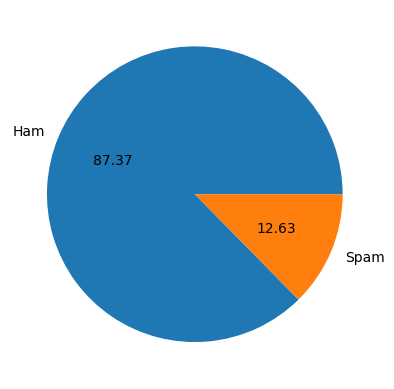

In [ ]:
import matplotlib.pyplot as plt
# Pie Chart for value counts in ham and spam
plt.pie(data["Category"].value_counts(),autopct = "%.2f",
        labels=['Ham','Spam'])
plt.show()

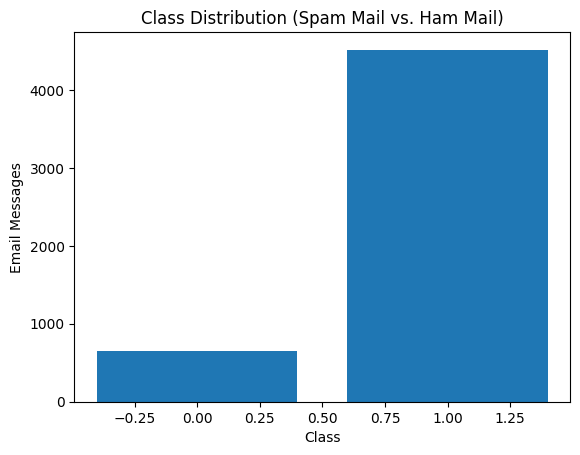

In [ ]:
# Class Distribution Bar Chart
class_counts = data['Category'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Email Messages')
plt.title('Class Distribution (Spam Mail vs. Ham Mail)')
plt.show()

In [ ]:
x = data['Message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [ ]:
y = data["Category"]
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5169, dtype: int64

In [ ]:
# Importing train test split library
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x_train)

X_train_cv = vectorizer.transform(x_train)
X_test_cv = vectorizer.transform(x_test)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_cv, y_train)

LogisticRegression()

In [ ]:
#Accuracy
y_pred = logreg.predict(X_test_cv)
print('Accuracy of logistic regression : {:.2f}'.format(logreg.score(X_test_cv, y_test)))

Accuracy of logistic regression : 0.98


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[127  18]
 [  4 885]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       145
           1       0.98      1.00      0.99       889

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9787234042553191
Precision: 0.9800664451827242
Recall: 0.9955005624296963
F1 score: 0.9877232142857143


In [ ]:
# Importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Using MultinomialNB for prediction Custom words
classifier = MultinomialNB()
classifier.fit(X_train_cv, y_train)

MultinomialNB()

In [ ]:
custom_word = "You won an amount"
custom_word_vec = vectorizer.transform([custom_word])
prediction = classifier.predict(custom_word_vec)[0]

if prediction == 1:
    prediction = "Spam"
else:
    prediction = "Ham"

print(f"Custom word '{custom_word}' is predicted as: {prediction}")

Custom word 'You won an amount' is predicted as: Spam
